In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

In [2]:

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:
| 
  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py3

## About Cambodia

Cambodia, officially the Kingdom of Cambodia is a country located in the southern portion of the Indochina peninsula in Southeast Asia. 
It is 181,035 square kilometres (69,898 square miles) in area, bordered by Thailand to the northwest, 
Laos to the northeast, Vietnam to the east and the Gulf of Thailand to the southwest. The sovereign state of Cambodia has a population of over 16 million.
The official religion is Theravada Buddhism, practised by approximately 95 percent of the population. 
The country's minority groups include Vietnamese, Chinese, Chams and 30 hill tribes.
[8] The capital and largest city is Phnom Penh, the political, economic and cultural centre of Cambodia. 
The kingdom is an elective constitutional monarchy with a monarch, currently Norodom Sihamoni, chosen by the Royal Throne Council as head of state.
The head of government is the Prime Minister, currently Hun Sen, the longest serving non-royal leader in Southeast Asia, ruling Cambodia since 1985. (https://en.wikipedia.org/wiki/Cambodia)

### View Cambodia Map

In [106]:
Cambodia_map=folium.Map(location=[12.565679, 104.990967 ], zoom_start=7, )

Cambodia_map

### Phnom Penh
Phnom Penh, the biggest city in Cambodia and also its wealthiest, is the cultural, commercial and political centre of the country. It is also home to more than a million of Cambodia's population of over 16 million. Covering an area of 345 sq km, Phnom Penh is located in the south-central region of Cambodia, at the confluence of the Tonle Sap, Mekong and Bassac rivers. The city offers extensive cultural and historical attractions, including temples, museums, the Royal Palace and also has accommodation from simple guesthouses to 5-star hotels. Phnom Penh also features good dining facilities as well as a vibrant and varied nightlife.

In [107]:
PhnomPenh_map=folium.Map(location=[11.556374, 104.928207 ], zoom_start=12)

PhnomPenh_map

In [5]:
import requests # library to handle requests
from bs4 import BeautifulSoup
import lxml.html as lh
import bs4 as bs
import urllib.request

#### Download and explore dataset from https://en.wikipedia.org/wiki/Economy_of_Cambodia

In [6]:
wikipedia_link='https://en.wikipedia.org/wiki/Economy_of_Cambodia'
website_url = requests.get(wikipedia_link).text
soup = BeautifulSoup(website_url, 'lxml')
#print(soup.prettify())
My_table = soup.find('table', {'class':'wikitable sortable'})
#My_table
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]

for row in My_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==9:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        I.append(cells[8].find(text=True))
        

In [7]:
dfCambodia=pd.DataFrame(A,columns=['Category'])
dfCambodia['2004']=B
dfCambodia['2005']=C
dfCambodia['2006']=D
dfCambodia['2007']=E
dfCambodia['2008']=F
dfCambodia['2009']=G
dfCambodia['2010']=H
dfCambodia['2011']=I

In [8]:
dfCambodia=dfCambodia.to_csv(r'cambodia.csv')

In [9]:
dfCambodia=pd.read_csv(r'cambodia.csv')
dfCambodia.head()

,Unnamed: 0,Category,2004,2005,2006,2007,2008,2009,2010,2011
0,0,"GNI per capita, PPP(current international $)","1,250","1,440","1,630","1,830","1,960","1,970","2,080","2,230\n"
1,1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31\n
2,2,GDP (Millions US$),"5,337.83","6,293.05","7,274.42","8,639.16","10,351.83","10,401.94","11,242.27","12,829.54\n"
3,3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07\n


In [11]:
dfCambodia['2011'] = dfCambodia['2011'].str.replace('\n','')
dfCambodia

,Unnamed: 0,Category,2004,2005,2006,2007,2008,2009,2010,2011
0,0,"GNI per capita, PPP(current international $)","1,250","1,440","1,630","1,830","1,960","1,970","2,080","2,230"
1,1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31
2,2,GDP (Millions US$),"5,337.83","6,293.05","7,274.42","8,639.16","10,351.83","10,401.94","11,242.27","12,829.54"
3,3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07


In [12]:
dfCambodia = dfCambodia.drop(dfCambodia.columns[[0]], axis=1)  
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011
0,"GNI per capita, PPP(current international $)","1,250","1,440","1,630","1,830","1,960","1,970","2,080","2,230"
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31
2,GDP (Millions US$),"5,337.83","6,293.05","7,274.42","8,639.16","10,351.83","10,401.94","11,242.27","12,829.54"
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07


In [13]:
dfCambodia["2004"]=dfCambodia["2004"].str.replace(',','')
dfCambodia["2005"]=dfCambodia["2005"].str.replace(',','')
dfCambodia["2006"]=dfCambodia["2006"].str.replace(',','')
dfCambodia["2007"]=dfCambodia["2007"].str.replace(',','')
dfCambodia["2008"]=dfCambodia["2008"].str.replace(',','')
dfCambodia["2009"]=dfCambodia["2009"].str.replace(',','')
dfCambodia["2010"]=dfCambodia["2010"].str.replace(',','')
dfCambodia["2011"]=dfCambodia["2011"].str.replace(',','')
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011
0,"GNI per capita, PPP(current international $)",1250,1440,1630,1830,1960,1970,2080,2230
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07


In [14]:
dfCambodia['2004'] = dfCambodia['2004'].astype(float)
dfCambodia['2005'] = dfCambodia['2005'].astype(float)
dfCambodia['2006'] = dfCambodia['2006'].astype(float)
dfCambodia['2007'] = dfCambodia['2007'].astype(float)
dfCambodia['2008'] = dfCambodia['2008'].astype(float)
dfCambodia['2009'] = dfCambodia['2009'].astype(float)
dfCambodia['2010'] = dfCambodia['2010'].astype(float)
dfCambodia['2011'] = dfCambodia['2011'].astype(float)
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011
0,"GNI per capita, PPP(current international $)",1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07


In [15]:
dfCambodia['Total'] = dfCambodia.sum(axis=1)
dfCambodia.head()

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,"GNI per capita, PPP(current international $)",1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [16]:
dfCambodia['Category'].replace({'GNI per capita, PPP(current international $)': 'GNI per capita($)'}, inplace=True)

In [17]:
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


##### Save file as economic.csv

In [18]:
dfCambodia.to_csv(r'economic_cambo.csv')

In [10]:
dfCambodia=pd.read_csv(r'economic_cambo.csv')
dfCambodia

,Unnamed: 0,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,0,GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [11]:
dfCambodia = dfCambodia.drop(dfCambodia.columns[[0]], axis=1)  
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


##### Add total column

In [12]:
# group categories and apply sum() function 
dfCambodia = dfCambodia.groupby('Category', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(dfCambodia.groupby('Category', axis=0)))

dfCambodia

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,2004,2005,2006,2007,2008,2009,2010,2011,Total
Category,,,,,,,,,
GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38
GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99


# Visualizing Data using Matplotlib<a id="4"></a>

In [13]:
years = list(map(str, range(2004, 2012)))
years

['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011']

In [14]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


In [15]:
dfCambodia.sort_values(['Total'], ascending=False, axis=0, inplace=True)
#dfCambodia = dfCambodia.head()
# transpose the dataframe
dfCambodia = dfCambodia[years].transpose() 

dfCambodia

Category,GDP (Millions US$),GNI per capita($),Total Population (Millions),GDP Growth (annual %)
2004,5337.83,1250.0,13.19,10.34
2005,6293.05,1440.0,13.36,13.25
2006,7274.42,1630.0,13.52,10.77
2007,8639.16,1830.0,13.67,10.21
2008,10351.83,1960.0,13.82,6.69
2009,10401.94,1970.0,13.98,0.09
2010,11242.27,2080.0,14.14,5.96
2011,12829.54,2230.0,14.31,7.07


Text(0.5, 0, 'Years')

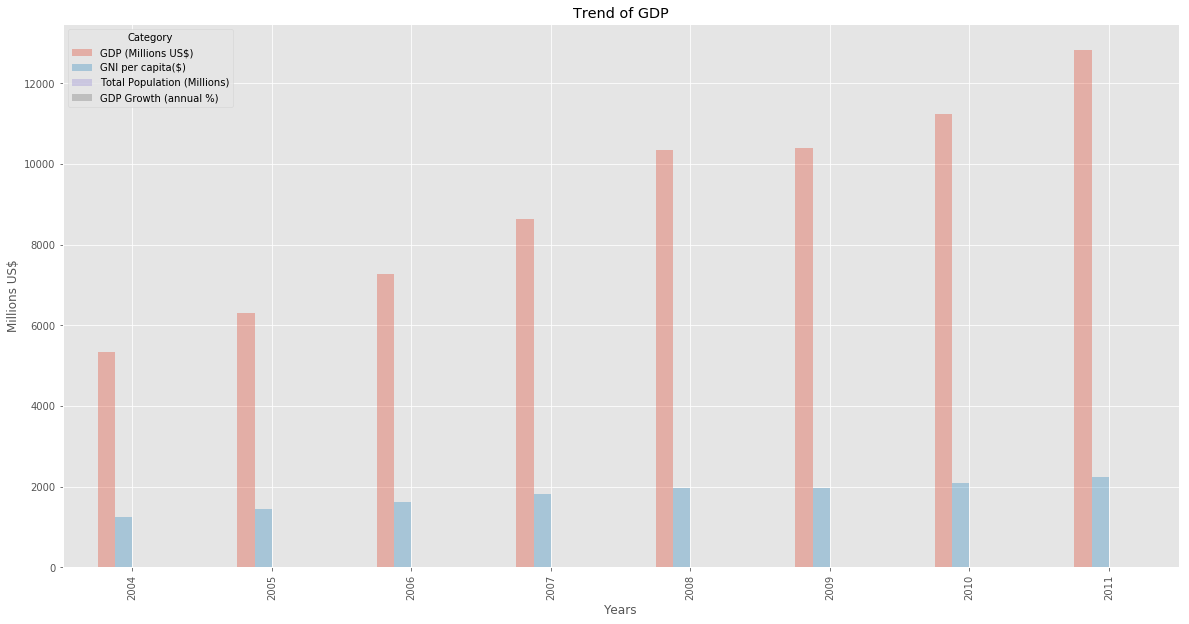

In [16]:
# option 2: preferred option with more flexibility
ax = dfCambodia.plot(kind='bar', alpha=0.35, figsize=(20, 10))

ax.set_title('Trend of GDP')
ax.set_ylabel('Millions US$')
ax.set_xlabel('Years')

### GDP and GNI per capita PPP(current international $)

In [17]:
dfCambodia =  pd.read_csv("economic_cambo.csv")

In [18]:
dfCambodia

,Unnamed: 0,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,0,GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [19]:
dfCambodia = dfCambodia.drop(dfCambodia.columns[[0]], axis=1)

In [20]:
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [21]:
dfCambodia.sort_values(by=['2011'])

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
0,GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04


In [22]:
dfCambodia=dfCambodia.loc[dfCambodia.index.isin([3,1])]
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [23]:
dfCambodia=  dfCambodia.reset_index()
dfCambodia.drop('index',axis=1,inplace=True)

In [24]:
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
1,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [25]:
dfCambodia['Total2'] = dfCambodia.sum(axis=1)
dfCambodia.head()

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total,Total2
0,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99,219.98
1,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38,128.76


In [26]:
# group categories and apply sum() function 
dfCambodia = dfCambodia.groupby('Category', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(dfCambodia.groupby('Category', axis=0)))

dfCambodia

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,2004,2005,2006,2007,2008,2009,2010,2011,Total,Total2
Category,,,,,,,,,,
GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38,128.76
Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99,219.98


In [27]:
years = list(map(str, range(2004, 2012)))
years

['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011']

In [28]:
dfCambodia.sort_values(['Total2'], ascending=False, axis=0, inplace=True)
#dfCambodia = dfCambodia.head()
# transpose the dataframe
dfCambodia = dfCambodia[years].transpose() 

dfCambodia

Category,Total Population (Millions),GDP Growth (annual %)
2004,13.19,10.34
2005,13.36,13.25
2006,13.52,10.77
2007,13.67,10.21
2008,13.82,6.69
2009,13.98,0.09
2010,14.14,5.96
2011,14.31,7.07


## Total Population and DGP Growth (annual%)

Text(0.5, 0, 'Years')

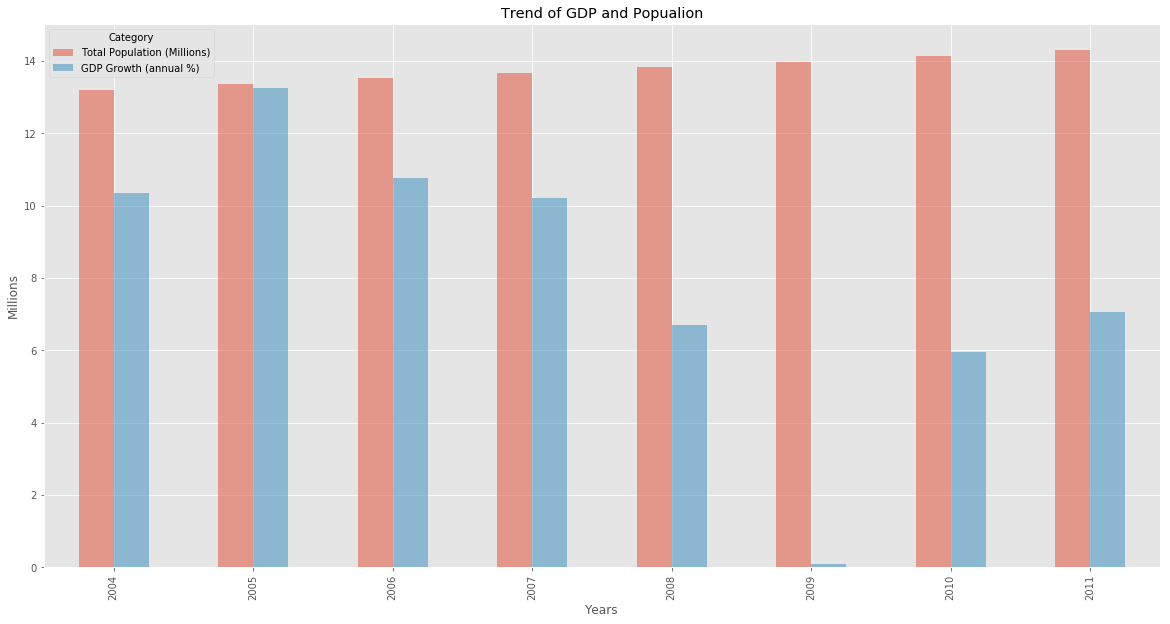

In [29]:
# option 2: preferred option with more flexibility
ax = dfCambodia.plot(kind='bar', alpha=0.5, figsize=(20, 10))

ax.set_title('Trend of GDP and Popualion')
ax.set_ylabel('Millions')
ax.set_xlabel('Years')

In [30]:
# @hidden_cell
#NEW CLIENT ID
#10WWZXF1DCJGVJESK1AAR3HXBRH1TLCTC4VQMRWIARK0QYEP
#CLIENT SECRET
#YHA3UXMLY4I5PYK2S2GRB0KVCK4P2CGXIP3FXERF324ZZHZW


CLIENT_ID = '10WWZXF1DCJGVJESK1AAR3HXBRH1TLCTC4VQMRWIARK0QYEP' # your Foursquare ID
CLIENT_SECRET = 'YHA3UXMLY4I5PYK2S2GRB0KVCK4P2CGXIP3FXERF324ZZHZW' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 40
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 10WWZXF1DCJGVJESK1AAR3HXBRH1TLCTC4VQMRWIARK0QYEP
CLIENT_SECRET:YHA3UXMLY4I5PYK2S2GRB0KVCK4P2CGXIP3FXERF324ZZHZW


#### Let's again assume that you are staying at the Quay hotel. So let's start by converting the Quay Hotel's address to its latitude and longitude coordinates.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

In [31]:
address = 'Sisowath Quay, Phnom Penh, Cambodia'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

11.5729662 104.9292037


## 1. Search for a specific venue category

## Search for hetels around Quay hotel

In [32]:
search_query = 'Hotel'
radius = 1500
print(search_query + ' .... OK!')

Hotel .... OK!


In [33]:
# @hidden_cell
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=10WWZXF1DCJGVJESK1AAR3HXBRH1TLCTC4VQMRWIARK0QYEP&client_secret=YHA3UXMLY4I5PYK2S2GRB0KVCK4P2CGXIP3FXERF324ZZHZW&ll=11.5729662,104.9292037&v=20180604&query=Hotel&radius=1500&limit=40'

In [34]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d161ab6d69ed0002cef94fc'},
 'response': {'venues': [{'id': '566444ae498e3f71fdff1afb',
    'name': 'De Art Boutique Hotel',
    'location': {'address': 'Preah Mohaksat Treiyani Kossamak',
     'lat': 11.5743276351061,
     'lng': 104.9269761392007,
     'labeledLatLngs': [{'label': 'display',
       'lat': 11.5743276351061,
       'lng': 104.9269761392007}],
     'distance': 286,
     'cc': 'KH',
     'country': 'កម្ពុជា',
     'formattedAddress': ['Preah Mohaksat Treiyani Kossamak', 'កម្ពុជា']},
    'categories': [{'id': '4bf58dd8d48988d1f8931735',
      'name': 'Bed & Breakfast',
      'pluralName': 'Bed & Breakfasts',
      'shortName': 'B & B',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/bedandbreakfast_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1561729718',
    'hasPerk': False},
   {'id': '4d12b87bd1848cfab365be71',
    'name': 'Sunway Hotel',
    'location': {'address': 'No. 1, Stre

In [35]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dfHotel = json_normalize(venues)
dfHotel.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...",False,566444ae498e3f71fdff1afb,Preah Mohaksat Treiyani Kossamak,KH,NaN,កម្ពុជា,NaN,286,"[Preah Mohaksat Treiyani Kossamak, កម្ពុជា]","[{'label': 'display', 'lat': 11.5743276351061,...",11.574328,104.926976,NaN,NaN,De Art Boutique Hotel,v-1561729718,NaN
1,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4d12b87bd1848cfab365be71,"No. 1, Street 92, Sangkat Wat Phnom",KH,Phnum Pénh,កម្ពុជា,NaN,918,"[No. 1, Street 92, Sangkat Wat Phnom, Phnum Pé...","[{'label': 'display', 'lat': 11.57628900916089...",11.576289,104.921491,NaN,Phnom Penh,Sunway Hotel,v-1561729718,NaN
2,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,533550f5498ee52eacefc6ca,"St Keo Chenda, Phume 1, Sangkat Chroy Changvar",KH,Phnum Pénh,កម្ពុជា,NaN,1036,"[St Keo Chenda, Phume 1, Sangkat Chroy Changva...","[{'label': 'display', 'lat': 11.56867413194179...",11.568674,104.937639,NaN,Phnom Penh,Sokha Phnom Penh Hotel & Residence,v-1561729718,NaN
3,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4e5c9532183883e00c0ab90c,No. 28-30 | ST 130,KH,Phnum Pénh,កម្ពុជា,Phsar Kandal I,172,"[No. 28-30 | ST 130 (Phsar Kandal I), Phnum Pé...","[{'label': 'display', 'lat': 11.57157622292065...",11.571576,104.928505,NaN,Phnom Penh,Indochine II Hotel,v-1561729718,NaN
4,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4bd857a92ecdce7233bad0f2,"No 63, Preah Norodom Blvd",KH,Phnum Pénh,កម្ពុជា,NaN,720,"[No 63, Preah Norodom Blvd, Phnum Pénh 12210, ...","[{'label': 'display', 'lat': 11.56826157203674...",11.568262,104.924664,12210,Phnom Penh,Sokha Club Hotel,v-1561729718,NaN


#### Clean data

In [36]:
dfHotel.drop(['categories','hasPerk','location.formattedAddress','location.crossStreet','location.city','location.labeledLatLngs','location.postalCode','venuePage.id'], axis=1, inplace=True)

dfHotel.head()

,id,location.address,location.cc,location.country,location.distance,location.lat,location.lng,location.state,name,referralId
0,566444ae498e3f71fdff1afb,Preah Mohaksat Treiyani Kossamak,KH,កម្ពុជា,286,11.574328,104.926976,NaN,De Art Boutique Hotel,v-1561729718
1,4d12b87bd1848cfab365be71,"No. 1, Street 92, Sangkat Wat Phnom",KH,កម្ពុជា,918,11.576289,104.921491,Phnom Penh,Sunway Hotel,v-1561729718
2,533550f5498ee52eacefc6ca,"St Keo Chenda, Phume 1, Sangkat Chroy Changvar",KH,កម្ពុជា,1036,11.568674,104.937639,Phnom Penh,Sokha Phnom Penh Hotel & Residence,v-1561729718
3,4e5c9532183883e00c0ab90c,No. 28-30 | ST 130,KH,កម្ពុជា,172,11.571576,104.928505,Phnom Penh,Indochine II Hotel,v-1561729718
4,4bd857a92ecdce7233bad0f2,"No 63, Preah Norodom Blvd",KH,កម្ពុជា,720,11.568262,104.924664,Phnom Penh,Sokha Club Hotel,v-1561729718


##### Rename field

In [37]:
dfHotel.rename(columns={'location.address':'Address', 'location.country':'Country','location.distance':'Distance','location.lat':'Latitude','location.lng':'Longtitude','location.state':'City'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
dfHotel.head()

,id,Address,location.cc,Country,Distance,Latitude,Longtitude,City,name,referralId
0,566444ae498e3f71fdff1afb,Preah Mohaksat Treiyani Kossamak,KH,កម្ពុជា,286,11.574328,104.926976,NaN,De Art Boutique Hotel,v-1561729718
1,4d12b87bd1848cfab365be71,"No. 1, Street 92, Sangkat Wat Phnom",KH,កម្ពុជា,918,11.576289,104.921491,Phnom Penh,Sunway Hotel,v-1561729718
2,533550f5498ee52eacefc6ca,"St Keo Chenda, Phume 1, Sangkat Chroy Changvar",KH,កម្ពុជា,1036,11.568674,104.937639,Phnom Penh,Sokha Phnom Penh Hotel & Residence,v-1561729718
3,4e5c9532183883e00c0ab90c,No. 28-30 | ST 130,KH,កម្ពុជា,172,11.571576,104.928505,Phnom Penh,Indochine II Hotel,v-1561729718
4,4bd857a92ecdce7233bad0f2,"No 63, Preah Norodom Blvd",KH,កម្ពុជា,720,11.568262,104.924664,Phnom Penh,Sokha Club Hotel,v-1561729718


In [38]:
dfHotel['Country'] = dfHotel['Country'].str.replace('កម្ពុជា','Cambodia')
#dfHotel['City'] = dfHotel['City'].str.replace('NaN','Phnom Penh')

dfHotel.head()

,id,Address,location.cc,Country,Distance,Latitude,Longtitude,City,name,referralId
0,566444ae498e3f71fdff1afb,Preah Mohaksat Treiyani Kossamak,KH,Cambodia,286,11.574328,104.926976,NaN,De Art Boutique Hotel,v-1561729718
1,4d12b87bd1848cfab365be71,"No. 1, Street 92, Sangkat Wat Phnom",KH,Cambodia,918,11.576289,104.921491,Phnom Penh,Sunway Hotel,v-1561729718
2,533550f5498ee52eacefc6ca,"St Keo Chenda, Phume 1, Sangkat Chroy Changvar",KH,Cambodia,1036,11.568674,104.937639,Phnom Penh,Sokha Phnom Penh Hotel & Residence,v-1561729718
3,4e5c9532183883e00c0ab90c,No. 28-30 | ST 130,KH,Cambodia,172,11.571576,104.928505,Phnom Penh,Indochine II Hotel,v-1561729718
4,4bd857a92ecdce7233bad0f2,"No 63, Preah Norodom Blvd",KH,Cambodia,720,11.568262,104.924664,Phnom Penh,Sokha Club Hotel,v-1561729718


In [39]:
dfHotel.shape

(40, 10)

In [40]:
dfHotel.to_csv(r'hotelCambodia.csv')

#### Read data from HotelCambodia

In [41]:
dfHotel=pd.read_csv(r'hotelCambodia.csv')

In [42]:
dfHotel = dfHotel.drop(dfHotel.columns[[0]], axis=1)  
dfHotel.head()

,id,Address,location.cc,Country,Distance,Latitude,Longtitude,City,name,referralId
0,566444ae498e3f71fdff1afb,Preah Mohaksat Treiyani Kossamak,KH,Cambodia,286,11.574328,104.926976,NaN,De Art Boutique Hotel,v-1561729718
1,4d12b87bd1848cfab365be71,"No. 1, Street 92, Sangkat Wat Phnom",KH,Cambodia,918,11.576289,104.921491,Phnom Penh,Sunway Hotel,v-1561729718
2,533550f5498ee52eacefc6ca,"St Keo Chenda, Phume 1, Sangkat Chroy Changvar",KH,Cambodia,1036,11.568674,104.937639,Phnom Penh,Sokha Phnom Penh Hotel & Residence,v-1561729718
3,4e5c9532183883e00c0ab90c,No. 28-30 | ST 130,KH,Cambodia,172,11.571576,104.928505,Phnom Penh,Indochine II Hotel,v-1561729718
4,4bd857a92ecdce7233bad0f2,"No 63, Preah Norodom Blvd",KH,Cambodia,720,11.568262,104.924664,Phnom Penh,Sokha Club Hotel,v-1561729718


## View on Phnom Penh Map

In [43]:
address = 'Phnom Penh, Cambodia'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto Canada are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Toronto Canada are 11.568271, 104.9224426.


In [108]:
# create map of Phnom Penh using latitude and longitude values
map_phnompenh = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(dfHotel['Latitude'], dfHotel['Longtitude'], dfHotel['name']):
    label = '{}, {}'.format(dfHotel, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_phnompenh)  
    
map_phnompenh

> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

#### Now, let's assume that it is lunch time, and you are craving Europeans food. So, let's define a query to search for Italian food that is within 500 metres from the Quay Hotel. 

In [45]:
search_query = 'KFC'
radius = 500
print(search_query + ' .... OK!')

KFC .... OK!


#### Define the corresponding URL

In [46]:
# @hidden_cell
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=10WWZXF1DCJGVJESK1AAR3HXBRH1TLCTC4VQMRWIARK0QYEP&client_secret=YHA3UXMLY4I5PYK2S2GRB0KVCK4P2CGXIP3FXERF324ZZHZW&ll=11.568271,104.9224426&v=20180604&query=KFC&radius=500&limit=40'

#### Send the GET Request and examine the results

In [47]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d161b0c9ba3e5002c77765d'},
 'response': {'venues': [{'id': '4c297048e19720a10198f958',
    'name': 'KFC',
    'location': {'address': 'No. 170, Preah Monivong',
     'lat': 11.568649975980398,
     'lng': 104.91872911072161,
     'labeledLatLngs': [{'label': 'display',
       'lat': 11.568649975980398,
       'lng': 104.91872911072161}],
     'distance': 407,
     'postalCode': '855',
     'cc': 'KH',
     'city': 'Phnum Pénh',
     'state': 'Phnom Penh',
     'country': 'កម្ពុជា',
     'formattedAddress': ['No. 170, Preah Monivong',
      'Phnum Pénh 855',
      'កម្ពុជា']},
    'categories': [{'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'shortName': 'Fast Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1561729804',
    'hasPerk': False},
   {'id': '4c9c47900

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [48]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,4c297048e19720a10198f958,"No. 170, Preah Monivong",KH,Phnum Pénh,កម្ពុជា,407,"[No. 170, Preah Monivong, Phnum Pénh 855, កម្ព...","[{'label': 'display', 'lat': 11.56864997598039...",11.568650,104.918729,855,Phnom Penh,KFC,v-1561729804
1,[],False,4c9c4790031337040e1654d5,NaN,KH,NaN,កម្ពុជា,412,[កម្ពុជា],"[{'label': 'display', 'lat': 11.568682, 'lng':...",11.568682,104.918682,NaN,NaN,KFC next to Diamond hotel,v-1561729804


#### Define information of interest and filter dataframe

In [49]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,KFC,Fast Food Restaurant,"No. 170, Preah Monivong",KH,Phnum Pénh,កម្ពុជា,407,"[No. 170, Preah Monivong, Phnum Pénh 855, កម្ព...","[{'label': 'display', 'lat': 11.56864997598039...",11.568650,104.918729,855,Phnom Penh,4c297048e19720a10198f958
1,KFC next to Diamond hotel,None,NaN,KH,NaN,កម្ពុជា,412,[កម្ពុជា],"[{'label': 'display', 'lat': 11.568682, 'lng':...",11.568682,104.918682,NaN,NaN,4c9c4790031337040e1654d5


In [173]:
dataframe_filtered.columns

Index(['name', 'categories', 'address', 'cc', 'city', 'country', 'distance',
       'formattedAddress', 'labeledLatLngs', 'lat', 'lng', 'postalCode',
       'state', 'id'],
      dtype='object')

##### Clean data

In [174]:
dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,KFC,Fast Food Restaurant,"No. 170, Preah Monivong",KH,Phnum Pénh,កម្ពុជា,407,"[No. 170, Preah Monivong, Phnum Pénh 855, កម្ពុជា]","[{'label': 'display', 'lat': 11.568649975980398, 'lng': 104.91872911072161}]",11.568650,104.918729,855,Phnom Penh,4c297048e19720a10198f958
1,KFC next to Diamond hotel,None,NaN,KH,NaN,កម្ពុជា,412,[កម្ពុជា],"[{'label': 'display', 'lat': 11.568682, 'lng': 104.918682}]",11.568682,104.918682,NaN,NaN,4c9c4790031337040e1654d5


In [50]:
dataframe_filtered['country'] = dataframe_filtered['country'].str.replace('កម្ពុជា','Cambodia')
#dfHotel['City'] = dfHotel['City'].str.replace('NaN','Phnom Penh')

dataframe_filtered.head()

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,KFC,Fast Food Restaurant,"No. 170, Preah Monivong",KH,Phnum Pénh,Cambodia,407,"[No. 170, Preah Monivong, Phnum Pénh 855, កម្ព...","[{'label': 'display', 'lat': 11.56864997598039...",11.568650,104.918729,855,Phnom Penh,4c297048e19720a10198f958
1,KFC next to Diamond hotel,None,NaN,KH,NaN,Cambodia,412,[កម្ពុជា],"[{'label': 'display', 'lat': 11.568682, 'lng':...",11.568682,104.918682,NaN,NaN,4c9c4790031337040e1654d5


In [51]:
dataframe_filtered.drop(['formattedAddress'], axis=1, inplace=True)
dataframe_filtered

,name,categories,address,cc,city,country,distance,labeledLatLngs,lat,lng,postalCode,state,id
0,KFC,Fast Food Restaurant,"No. 170, Preah Monivong",KH,Phnum Pénh,Cambodia,407,"[{'label': 'display', 'lat': 11.56864997598039...",11.568650,104.918729,855,Phnom Penh,4c297048e19720a10198f958
1,KFC next to Diamond hotel,None,NaN,KH,NaN,Cambodia,412,"[{'label': 'display', 'lat': 11.568682, 'lng':...",11.568682,104.918682,NaN,NaN,4c9c4790031337040e1654d5


#### Let's visualize the KFC restaurants that are nearby

In [52]:
dataframe_filtered.name

0                          KFC
1    KFC next to Diamond hotel
Name: name, dtype: object

In [109]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup=' The Quay Hotel Phnom Penh',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## 2. Explore a Given Venue
> `https://api.foursquare.com/v2/venues/`**VENUE_ID**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&v=`**VERSION**

### A. Let's explore the closest of KFC

In [54]:
# @hidden_cell
venue_id = '4c297048e19720a10198f958' #Fast Food Restaurant	
#venue_id = '4ecf21ae8231b9ef870d3697' # ID of KFC - Phsar Chas
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4c297048e19720a10198f958?client_id=10WWZXF1DCJGVJESK1AAR3HXBRH1TLCTC4VQMRWIARK0QYEP&client_secret=YHA3UXMLY4I5PYK2S2GRB0KVCK4P2CGXIP3FXERF324ZZHZW&v=20180604'

#### Send GET request for result

In [55]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4c297048e19720a10198f958',
 'name': 'KFC',
 'contact': {'phone': '+85523996000', 'formattedPhone': '+855 23 996 000'},
 'location': {'address': 'No. 170, Preah Monivong',
  'lat': 11.568649975980398,
  'lng': 104.91872911072161,
  'labeledLatLngs': [{'label': 'display',
    'lat': 11.568649975980398,
    'lng': 104.91872911072161}],
  'postalCode': '855',
  'cc': 'KH',
  'city': 'Phnum Pénh',
  'state': 'Phnom Penh',
  'country': 'កម្ពុជា',
  'formattedAddress': ['No. 170, Preah Monivong',
   'Phnum Pénh 855',
   'កម្ពុជា']},
 'canonicalUrl': 'https://foursquare.com/v/kfc/4c297048e19720a10198f958',
 'categories': [{'id': '4bf58dd8d48988d16e941735',
   'name': 'Fast Food Restaurant',
   'pluralName': 'Fast Food Restaurants',
   'shortName': 'Fast Food',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 3},
 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}

### B. Get the venue's overall rating

In [56]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.3


Let's check the rating of the second closet of KFC.

In [57]:
venue_id = '4dccbfd6ae603b786d0671af' # ID of KFC
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.2


### C. Get the number of tips

In [58]:
result['response']['venue']['tips']['count']

13

In [59]:
result['response']['venue']['tips']

{'count': 13,
 'groups': [{'type': 'others',
   'name': 'All tips',
   'count': 13,
   'items': [{'id': '4d6379d6dcafa1cd3eb97111',
     'createdAt': 1298364886,
     'text': 'Good wifi!!!!',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/4d6379d6dcafa1cd3eb97111',
     'lang': 'en',
     'likes': {'count': 4,
      'groups': [{'type': 'others', 'count': 4, 'items': []}],
      'summary': '4 likes'},
     'logView': True,
     'agreeCount': 0,
     'disagreeCount': 0,
     'todo': {'count': 0},
     'user': {'id': '6977422',
      'firstName': 'Danny',
      'lastName': 'M',
      'gender': 'male',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/TTTGIHXSYEOWBCKK.jpg'}}}]}]}

### D. Get the venue's tips
> `https://api.foursquare.com/v2/venues/`**VENUE_ID**`/tips?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&v=`**VERSION**`&limit=`**LIMIT**

#### Create URL and send GET request. Make sure to set limit to get all tips

In [60]:
## Ecco Tips
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d161bbec530930039a8e37a'},
 'response': {'tips': {'count': 13,
   'items': [{'id': '4df5ab33cc3fc3e01352c57f',
     'createdAt': 1307945779,
     'text': 'Try their Chicken Fillet with Green Curry.  Its a little bit spicy and very delicious,  Just for 2 USD for a set meal (with rice and pepsi).',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/4df5ab33cc3fc3e01352c57f',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 0,
     'disagreeCount': 0,
     'todo': {'count': 1},
     'user': {'id': '9525376',
      'firstName': 'Neil Ian',
      'lastName': 'U',
      'gender': 'male',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/UNFRK45IPXXQUYUJ.png'}}}]}}}

#### Get tips and list of associated features

In [61]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user'])

#### Format column width and display all tips

In [62]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Try their Chicken Fillet with Green Curry. Its a little bit spicy and very delicious, Just for 2 USD for a set meal (with rice and pepsi).",0,0,4df5ab33cc3fc3e01352c57f,Neil Ian,U,male,9525376


## 3. Search a Foursquare User
> `https://api.foursquare.com/v2/users/`**USER_ID**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&v=`**VERSION**

### Define URL, send GET request and display features associated with user

In [63]:
user_id = '9525376' # user ID with most agree counts and complete profile

url = 'https://api.foursquare.com/v2/users/{}?client_id={}&client_secret={}&v={}'.format(user_id, CLIENT_ID, CLIENT_SECRET, VERSION) # define URL

# send GET request
results = requests.get(url).json()
user_data = results['response']['user']

# display features associated with user
user_data.keys()

dict_keys(['id', 'firstName', 'lastName', 'gender', 'canonicalUrl', 'photo', 'friends', 'tips', 'homeCity', 'bio', 'contact', 'superuser', 'photos', 'type', 'mayorships', 'checkins', 'lists', 'lenses'])

In [64]:
print('First Name: ' + user_data['firstName'])
print('Last Name: ' + user_data['lastName'])
print('Home City: ' + user_data['homeCity'])

First Name: Neil Ian
Last Name: U
Home City: Phnom Penh, Cambodia


#### How many tips has this user submitted?

In [65]:
user_data['tips']

{'count': 10}

Wow! So it turns out that Neil Ian U not so active with foursquare user

### Get User's tips

In [66]:
# define tips URL
url = 'https://api.foursquare.com/v2/users/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(user_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

# send GET request and get user's tips
results = requests.get(url).json()
tips = results['response']['tips']['items']

# format column width
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips)

# filter columns
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display user's tips
tips_filtered

,text,agreeCount,disagreeCount,id
0,The best spaghetti i've ever tasted.,0,0,4e75de9a1f6e072f13dae34f
1,Very nice place. With style and class.,0,0,4e75d81bc65bb91db488fa49
2,"Tasty Fried Rice (Pork, Beef, Seafood, or vegetarian)",0,0,4e27fb12813075c06dbc0c89
3,Good bags. Free bottled water. Friendly staff,0,0,4e104b90b61c637b97a2c59b
4,"Try their Chicken Fillet with Green Curry. Its a little bit spicy and very delicious, Just for 2 USD for a set meal (with rice and pepsi).",0,0,4df5ab33cc3fc3e01352c57f
5,"If you want to go on Sundays, better be early. The line tends to get longer. Lots of people loves this place.",0,0,4df35587483bdb5e1373be91
6,"Don't forget to grab some of their freebees. They hot maps, visitor guide and d2d.",0,0,4de47ff2fa7651589f2fdfc5
7,Friendly Staff and Friendly tuktuk and moto drivers outside waiting to take you wherever you like to go.,0,0,4dd7525dcc3f75159f1f1996
8,"If you are a frequent customer, avail their VIP membership and get a discount everytime you eat here. You can also use the VIP card on their other branches.",0,0,4dd74f54cc3f75159f1f082e
9,If you like chicken this your place,0,0,4dd4a799183859a589a81eeb


#### The venue tip of Neil Ian no greatest number

### Get User's friends

In [67]:
user_friends = json_normalize(user_data['friends']['groups'][0]['items'])
user_friends

,bio,firstName,gender,homeCity,id,lastName,lists.groups,photo.prefix,photo.suffix,tips.count
0,,Gareth,male,Belfast,79274426,P,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/79274426-IHDVOXHJJX3AY2P4.jpg,10
1,,Eracil,female,"Phnom Penh, 22",70610658,M,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/70610658-EE5TO1B0KPCUHRGM.jpg,2
2,,Sebastian,male,"Bangalore, India",55255194,D,"[{'type': 'created', 'count': 3, 'items': []}]",https://fastly.4sqi.net/img/user/,/55255194_YZ3V5BOR_sWY_xxqjYUFG-DTOI1SGhCl4n2jIz9yOCOxYDNLmgBb8yNbpoN7bMa0k6dhO4SeN.jpg,6
3,,Narith,male,"Phnom Penh, 22",63799708,S,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/2AYD2P2L53BCGEC3.jpg,0
4,,Racil,female,"Phnom Penh, 22",62019691,V,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/RFBRB4GBE11DBBUV.jpg,3
5,,tom,male,Cambodia,9199179,S,"[{'type': 'created', 'count': 4, 'items': []}]",https://fastly.4sqi.net/img/user/,/9199179-Z0WLJYJYYAHHVCMW.jpg,6
6,,Socheat,male,Phnom Penh,22667285,K,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/ZH1WYB2VA32FASCX.jpg,0
7,,Socheata,female,"Russei Kaev, Cambodia",5056294,L,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/YVNRQLKBXPJR4ZUT.jpg,0
8,,Victor,male,"Phnom Penh, Cambodia",3934753,K,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/3934753_0EfJdWNn_rfZBJ2vCt622V7nSQRhoqQ2kMvdxff1I1xKW4CEOJXFp2O4AVe1AooXw96IjqcQs.jpg,30
9,,Milan,male,"Daun Penh, Cambodia",4392336,P,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/0F13FW5KPBTA55LM.jpg,2


In [68]:
user_data

{'id': '9525376',
 'firstName': 'Neil Ian',
 'lastName': 'U',
 'gender': 'male',
 'canonicalUrl': 'https://foursquare.com/user/9525376',
 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
  'suffix': '/UNFRK45IPXXQUYUJ.png'},
 'friends': {'count': 23,
  'groups': [{'type': 'others',
    'name': 'Other friends',
    'count': 23,
    'items': [{'id': '79274426',
      'firstName': 'Gareth',
      'lastName': 'P',
      'gender': 'male',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/79274426-IHDVOXHJJX3AY2P4.jpg'},
      'tips': {'count': 10},
      'lists': {'groups': [{'type': 'created', 'count': 2, 'items': []}]},
      'homeCity': 'Belfast',
      'bio': '',
      'contact': {}},
     {'id': '70610658',
      'firstName': 'Eracil',
      'lastName': 'M',
      'gender': 'female',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/70610658-EE5TO1B0KPCUHRGM.jpg'},
      'tips': {'count': 2},
      'lists': {'group

Interesting. He has many friends on Foursquare.

In [69]:
# 1. grab prefix of photo
# 2. grab suffix of photo
# 3. concatenate them using the image size  
Image(url='https://igx.4sqi.net/img/user/300x300/79274426-IHDVOXHJJX3AY2P4.jpg')

## 4. Explore a location
> `https://api.foursquare.com/v2/venues/`**explore**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&limit=`**LIMIT**

#### Get Location of KFC

In [70]:
#tip_id='4c297048e19720a10198f958'
tip_id = '4d6379d6dcafa1cd3eb97111' # tip id KFC

# define URL
url = 'http://api.foursquare.com/v2/tips/{}?client_id={}&client_secret={}&v={}'.format(tip_id, CLIENT_ID, CLIENT_SECRET, VERSION)

# send GET Request and examine results
result = requests.get(url).json()
print(result['response']['tip']['venue']['name'])
print(result['response']['tip']['venue']['location'])

KFC
{'address': 'St Sisowath Wat Phnom Penh', 'crossStreet': 'Riverside', 'lat': 11.575766587332486, 'lng': 104.92643658166334, 'labeledLatLngs': [{'label': 'display', 'lat': 11.575766587332486, 'lng': 104.92643658166334}], 'postalCode': '855', 'cc': 'KH', 'city': 'Phnum Pénh', 'state': 'Phnom Penh', 'country': 'កម្ពុជា', 'formattedAddress': ['St Sisowath Wat Phnom Penh (Riverside)', 'Phnum Pénh 855', 'កម្ពុជា']}


In [93]:
latitude=11.568650
longitude=104.918729

#### Define URL

In [94]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=10WWZXF1DCJGVJESK1AAR3HXBRH1TLCTC4VQMRWIARK0QYEP&client_secret=YHA3UXMLY4I5PYK2S2GRB0KVCK4P2CGXIP3FXERF324ZZHZW&ll=11.56865,104.918729&v=20180604&radius=500&limit=40'

In [95]:
import requests

In [96]:
results = requests.get(url).json()
'There are {} around KFC.'.format(len(results['response']['groups'][0]['items']))

'There are 18 around KFC.'

#### Get relevant part of JSON

In [97]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4bcd3ff88920b71320929fdc',
  'name': 'Thmorda Restaurant | ភោជនីយដ្ឋាន ថ្មដា (ថ្មដា)',
  'location': {'address': '90, Kampuchear Krom St.',
   'lat': 11.569060380796008,
   'lng': 104.91747679415455,
   'labeledLatLngs': [{'label': 'display',
     'lat': 11.569060380796008,
     'lng': 104.91747679415455}],
   'distance': 144,
   'cc': 'KH',
   'city': 'Toul Kork',
   'state': 'Phnom Penh',
   'country': 'កម្ពុជា',
   'formattedAddress': ['90, Kampuchear Krom St.', 'Toul Kork', 'កម្ពុជា']},
  'categories': [{'id': '52e81612bcbc57f1066b7a03',
    'name': 'Cambodian Restaurant',
    'pluralName': 'Cambodian Restaurants',
    'shortName': 'Cambodian',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId':

#### Process JSON and convert it to a clean dataframe

In [98]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Thmorda Restaurant | ភោជនីយដ្ឋាន ថ្មដា (ថ្មដា),Cambodian Restaurant,"90, Kampuchear Krom St.",KH,Toul Kork,កម្ពុជា,NaN,144,"[90, Kampuchear Krom St., Toul Kork, កម្ពុជា]","[{'label': 'display', 'lat': 11.569060380796008, 'lng': 104.91747679415455}]",11.569060,104.917477,Phnom Penh,4bcd3ff88920b71320929fdc
1,Brown Coffee Raintree,Coffee Shop,NaN,KH,NaN,កម្ពុជា,NaN,361,[កម្ពុជា],"[{'label': 'display', 'lat': 11.571886340483152, 'lng': 104.91896852974169}]",11.571886,104.918969,Phnom Penh,578738d3498edeb6a9b4c2f2
2,ភោជនីយដ្ឋាន​ ល្បាប់,Cambodian Restaurant,Monivong Blvd,KH,Phnum Pénh,កម្ពុជា,NaN,406,"[Monivong Blvd, Phnum Pénh, កម្ពុជា]","[{'label': 'display', 'lat': 11.572219, 'lng': 104.917962}]",11.572219,104.917962,Phnom Penh,593f75212347241900f78403
3,Sam Doo Chinese Restaurant,Chinese Restaurant,NaN,KH,NaN,កម្ពុជា,NaN,68,[កម្ពុជា],"[{'label': 'display', 'lat': 11.569231549562652, 'lng': 104.91893377382712}]",11.569232,104.918934,NaN,4c2c2ae357a9c9b6a720f767
4,The Billabong Hotel,Hotel,#5 Street 158,KH,Phnum Pénh,កម្ពុជា,NaN,361,"[#5 Street 158, Phnum Pénh, កម្ពុជា]","[{'label': 'display', 'lat': 11.56615766192432, 'lng': 104.9208608084018}]",11.566158,104.920861,Phnom Penh,4b8ba134f964a520fca432e3
5,Klang Boy (Bak Kut Teh),Asian Restaurant,NaN,KH,NaN,កម្ពុជា,NaN,138,[កម្ពុជា],"[{'label': 'display', 'lat': 11.569350907330021, 'lng': 104.91977621571375}]",11.569351,104.919776,Phnom Penh,4ca968f897c8a1cdf2c08ea5
6,Eric Kayser Artisan Boulanger @ Vattanac Capital,Bakery,Monivong Blvd,KH,Phumĭ Vôtt Phnum,កម្ពុជា,NaN,498,"[Monivong Blvd, Phumĭ Vôtt Phnum, កម្ពុជា]","[{'label': 'display', 'lat': 11.573129991160739, 'lng': 104.91868428661861}]",11.573130,104.918684,Kampong Speu,56079cf5498eff8b262bef74
7,Village Roast Duck - Raintree,Chinese Restaurant,NaN,KH,NaN,កម្ពុជា,NaN,437,[កម្ពុជា],"[{'label': 'display', 'lat': 11.572568, 'lng': 104.919043}]",11.572568,104.919043,Phnom Penh,57eca021498e315fa55fb5d8
8,Cafe Malaya,Malay Restaurant,NaN,KH,NaN,កម្ពុជា,NaN,309,[កម្ពុជា],"[{'label': 'display', 'lat': 11.5709244892022, 'lng': 104.92035986325342}]",11.570924,104.920360,NaN,4d352ad298336dcba1f63ef0
9,"Dim Sum Emperors, Wong Meas Co., Ltd",Dim Sum Restaurant,"#48 E1,E2 St 53",KH,Phnum Pénh,កម្ពុជា,130,377,"[#48 E1,E2 St 53 (130), Phnum Pénh, កម្ពុជា]","[{'label': 'display', 'lat': 11.569834086821624, 'lng': 104.92197082568416}]",11.569834,104.921971,Phnom Penh,513c079ae4b04f70281c51b0


#### Let's visualize these items on the map around our location

In [110]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around KFC


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

#### Clean Data

In [100]:
dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Thmorda Restaurant | ភោជនីយដ្ឋាន ថ្មដា (ថ្មដា),Cambodian Restaurant,"90, Kampuchear Krom St.",KH,Toul Kork,កម្ពុជា,NaN,144,"[90, Kampuchear Krom St., Toul Kork, កម្ពុជា]","[{'label': 'display', 'lat': 11.569060380796008, 'lng': 104.91747679415455}]",11.569060,104.917477,Phnom Penh,4bcd3ff88920b71320929fdc
1,Brown Coffee Raintree,Coffee Shop,NaN,KH,NaN,កម្ពុជា,NaN,361,[កម្ពុជា],"[{'label': 'display', 'lat': 11.571886340483152, 'lng': 104.91896852974169}]",11.571886,104.918969,Phnom Penh,578738d3498edeb6a9b4c2f2
2,ភោជនីយដ្ឋាន​ ល្បាប់,Cambodian Restaurant,Monivong Blvd,KH,Phnum Pénh,កម្ពុជា,NaN,406,"[Monivong Blvd, Phnum Pénh, កម្ពុជា]","[{'label': 'display', 'lat': 11.572219, 'lng': 104.917962}]",11.572219,104.917962,Phnom Penh,593f75212347241900f78403
3,Sam Doo Chinese Restaurant,Chinese Restaurant,NaN,KH,NaN,កម្ពុជា,NaN,68,[កម្ពុជា],"[{'label': 'display', 'lat': 11.569231549562652, 'lng': 104.91893377382712}]",11.569232,104.918934,NaN,4c2c2ae357a9c9b6a720f767
4,The Billabong Hotel,Hotel,#5 Street 158,KH,Phnum Pénh,កម្ពុជា,NaN,361,"[#5 Street 158, Phnum Pénh, កម្ពុជា]","[{'label': 'display', 'lat': 11.56615766192432, 'lng': 104.9208608084018}]",11.566158,104.920861,Phnom Penh,4b8ba134f964a520fca432e3


In [101]:
dataframe_filtered['country'] = dataframe_filtered['country'].str.replace('កម្ពុជា','Cambodia')
#dfHotel['City'] = dfHotel['City'].str.replace('NaN','Phnom Penh')

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Thmorda Restaurant | ភោជនីយដ្ឋាន ថ្មដា (ថ្មដា),Cambodian Restaurant,"90, Kampuchear Krom St.",KH,Toul Kork,Cambodia,NaN,144,"[90, Kampuchear Krom St., Toul Kork, កម្ពុជា]","[{'label': 'display', 'lat': 11.569060380796008, 'lng': 104.91747679415455}]",11.569060,104.917477,Phnom Penh,4bcd3ff88920b71320929fdc
1,Brown Coffee Raintree,Coffee Shop,NaN,KH,NaN,Cambodia,NaN,361,[កម្ពុជា],"[{'label': 'display', 'lat': 11.571886340483152, 'lng': 104.91896852974169}]",11.571886,104.918969,Phnom Penh,578738d3498edeb6a9b4c2f2
2,ភោជនីយដ្ឋាន​ ល្បាប់,Cambodian Restaurant,Monivong Blvd,KH,Phnum Pénh,Cambodia,NaN,406,"[Monivong Blvd, Phnum Pénh, កម្ពុជា]","[{'label': 'display', 'lat': 11.572219, 'lng': 104.917962}]",11.572219,104.917962,Phnom Penh,593f75212347241900f78403
3,Sam Doo Chinese Restaurant,Chinese Restaurant,NaN,KH,NaN,Cambodia,NaN,68,[កម្ពុជា],"[{'label': 'display', 'lat': 11.569231549562652, 'lng': 104.91893377382712}]",11.569232,104.918934,NaN,4c2c2ae357a9c9b6a720f767
4,The Billabong Hotel,Hotel,#5 Street 158,KH,Phnum Pénh,Cambodia,NaN,361,"[#5 Street 158, Phnum Pénh, កម្ពុជា]","[{'label': 'display', 'lat': 11.56615766192432, 'lng': 104.9208608084018}]",11.566158,104.920861,Phnom Penh,4b8ba134f964a520fca432e3


In [102]:
dataframe_filtered.shape

(18, 14)

In [113]:
dataframe_filtered.head()

,name,categories,address,city,country,distance,formattedAddress,lat,lng,state,id
0,Thmorda Restaurant | ភោជនីយដ្ឋាន ថ្មដា (ថ្មដា),Cambodian Restaurant,"90, Kampuchear Krom St.",Toul Kork,Cambodia,144,"[90, Kampuchear Krom St., Toul Kork, កម្ពុជា]",11.569060,104.917477,Phnom Penh,4bcd3ff88920b71320929fdc
1,Brown Coffee Raintree,Coffee Shop,NaN,NaN,Cambodia,361,[កម្ពុជា],11.571886,104.918969,Phnom Penh,578738d3498edeb6a9b4c2f2
2,ភោជនីយដ្ឋាន​ ល្បាប់,Cambodian Restaurant,Monivong Blvd,Phnum Pénh,Cambodia,406,"[Monivong Blvd, Phnum Pénh, កម្ពុជា]",11.572219,104.917962,Phnom Penh,593f75212347241900f78403
3,Sam Doo Chinese Restaurant,Chinese Restaurant,NaN,NaN,Cambodia,68,[កម្ពុជា],11.569232,104.918934,NaN,4c2c2ae357a9c9b6a720f767
4,The Billabong Hotel,Hotel,#5 Street 158,Phnum Pénh,Cambodia,361,"[#5 Street 158, Phnum Pénh, កម្ពុជា]",11.566158,104.920861,Phnom Penh,4b8ba134f964a520fca432e3


In [114]:
dataframe_filtered.rename(columns={'formattedAddress':'Address'}, inplace=True)


In [115]:
dataframe_filtered.head()

,name,categories,address,city,country,distance,Address,lat,lng,state,id
0,Thmorda Restaurant | ភោជនីយដ្ឋាន ថ្មដា (ថ្មដា),Cambodian Restaurant,"90, Kampuchear Krom St.",Toul Kork,Cambodia,144,"[90, Kampuchear Krom St., Toul Kork, កម្ពុជា]",11.569060,104.917477,Phnom Penh,4bcd3ff88920b71320929fdc
1,Brown Coffee Raintree,Coffee Shop,NaN,NaN,Cambodia,361,[កម្ពុជា],11.571886,104.918969,Phnom Penh,578738d3498edeb6a9b4c2f2
2,ភោជនីយដ្ឋាន​ ល្បាប់,Cambodian Restaurant,Monivong Blvd,Phnum Pénh,Cambodia,406,"[Monivong Blvd, Phnum Pénh, កម្ពុជា]",11.572219,104.917962,Phnom Penh,593f75212347241900f78403
3,Sam Doo Chinese Restaurant,Chinese Restaurant,NaN,NaN,Cambodia,68,[កម្ពុជា],11.569232,104.918934,NaN,4c2c2ae357a9c9b6a720f767
4,The Billabong Hotel,Hotel,#5 Street 158,Phnum Pénh,Cambodia,361,"[#5 Street 158, Phnum Pénh, កម្ពុជា]",11.566158,104.920861,Phnom Penh,4b8ba134f964a520fca432e3


In [116]:
dataframe_filtered.drop(['address','city'], axis=1, inplace=True)
dataframe_filtered.head()

,name,categories,country,distance,Address,lat,lng,state,id
0,Thmorda Restaurant | ភោជនីយដ្ឋាន ថ្មដា (ថ្មដា),Cambodian Restaurant,Cambodia,144,"[90, Kampuchear Krom St., Toul Kork, កម្ពុជា]",11.569060,104.917477,Phnom Penh,4bcd3ff88920b71320929fdc
1,Brown Coffee Raintree,Coffee Shop,Cambodia,361,[កម្ពុជា],11.571886,104.918969,Phnom Penh,578738d3498edeb6a9b4c2f2
2,ភោជនីយដ្ឋាន​ ល្បាប់,Cambodian Restaurant,Cambodia,406,"[Monivong Blvd, Phnum Pénh, កម្ពុជា]",11.572219,104.917962,Phnom Penh,593f75212347241900f78403
3,Sam Doo Chinese Restaurant,Chinese Restaurant,Cambodia,68,[កម្ពុជា],11.569232,104.918934,NaN,4c2c2ae357a9c9b6a720f767
4,The Billabong Hotel,Hotel,Cambodia,361,"[#5 Street 158, Phnum Pénh, កម្ពុជា]",11.566158,104.920861,Phnom Penh,4b8ba134f964a520fca432e3


## 5. Explore Trending Venues
> `https://api.foursquare.com/v2/venues/`**trending**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**

In [88]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d161dc1bf7dde002ca1dc6b'},
 'response': {'venues': []}}

### Check if any venues are trending at this time

In [89]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [90]:
# display trending venues
trending_venues_df

'No trending venues are available at the moment!'

### Visualize trending venues

In [91]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup='KFC',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

In [92]:
# display map
venues_map

'Cannot generate visual as no trending venues are available at the moment!'